# Airbnb
## Availability Data

This dataset provides insight on whether a listing was available or not on a given date. With that, we can understand listing availability on Airbnb, and use this data to predict availability using Machine Learning.

Here, we're going to focus on the `available` feature, which can take two possible states:

* f = False, which means it is not available (It's booked)
* t = True, which means it is available (It's not booked)


In [1]:
import pandas as pd

df = pd.read_parquet('/Users/rafaelduarte/Projects/airbnb/data/raw/new-york-city/calendar-2023-10-01.csv.parquet')
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2023-10-02,f,$240.00,$240.00,30.0,1125.0
1,2595,2023-10-03,f,$240.00,$240.00,30.0,1125.0
2,2595,2023-10-04,f,$240.00,$240.00,30.0,1125.0
3,2595,2023-10-05,f,$240.00,$240.00,30.0,1125.0
4,2595,2023-10-06,f,$240.00,$240.00,30.0,1125.0
5,2595,2023-10-07,f,$240.00,$240.00,30.0,1125.0
6,2595,2023-10-08,f,$240.00,$240.00,30.0,1125.0
7,2595,2023-10-09,f,$240.00,$240.00,30.0,1125.0
8,2595,2023-10-10,f,$240.00,$240.00,30.0,1125.0
9,2595,2023-10-11,f,$240.00,$240.00,30.0,1125.0


In [2]:
df.shape

(14159104, 7)

In [3]:
# Add new columns
df['Year'] = df['date'].dt.isocalendar().year
df['Quarter'] = df['date'].dt.quarter
df['Month'] = df['date'].dt.month
df['Week'] = df['date'].dt.isocalendar().week
df['Weekday'] = df['date'].dt.weekday
df['Day'] = df['date'].dt.day
df['Dayofyear'] = df['date'].dt.dayofyear
df['Date'] = df['date'].dt.date

# Add 'Weekend' column
df['Weekend'] = df['date'].dt.weekday // 5  # 0 for weekdays, 1 for weekends

df.index = pd.to_datetime(df['date'], infer_datetime_format=True)

In [4]:
df.head(30)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date,Weekend
date,,,,,,,,,,,,,,,,
2023-10-02,2595,2023-10-02,f,$240.00,$240.00,30.0,1125.0,2023,4,10,40,0,2,275,2023-10-02,0
2023-10-03,2595,2023-10-03,f,$240.00,$240.00,30.0,1125.0,2023,4,10,40,1,3,276,2023-10-03,0
2023-10-04,2595,2023-10-04,f,$240.00,$240.00,30.0,1125.0,2023,4,10,40,2,4,277,2023-10-04,0
2023-10-05,2595,2023-10-05,f,$240.00,$240.00,30.0,1125.0,2023,4,10,40,3,5,278,2023-10-05,0
2023-10-06,2595,2023-10-06,f,$240.00,$240.00,30.0,1125.0,2023,4,10,40,4,6,279,2023-10-06,0
2023-10-07,2595,2023-10-07,f,$240.00,$240.00,30.0,1125.0,2023,4,10,40,5,7,280,2023-10-07,1
2023-10-08,2595,2023-10-08,f,$240.00,$240.00,30.0,1125.0,2023,4,10,40,6,8,281,2023-10-08,1
2023-10-09,2595,2023-10-09,f,$240.00,$240.00,30.0,1125.0,2023,4,10,41,0,9,282,2023-10-09,0
2023-10-10,2595,2023-10-10,f,$240.00,$240.00,30.0,1125.0,2023,4,10,41,1,10,283,2023-10-10,0


### Group By

Here, we're going to group our data per week, per listing.

In [5]:
# Step 1: Filter the DataFrame to include only rows where 'available' is 'f'
filtered_df = df[df['available'] == 'f']

# Step 2 and 3: Group by 'listing_id' and count 'f' entries
count_f_entries = filtered_df.groupby('listing_id')['available'].count()

# Step 4: Find the 'listing_id' with the highest count of 'f' entries (highest occupancy rate)
listing_id_with_highest_f_count = count_f_entries.idxmax()

print("Listing ID with the highest occupancy rate:", listing_id_with_highest_f_count)


Listing ID with the highest occupancy rate: 11943


In [6]:
import random

# Assuming your DataFrame is named 'df'

# Get a list of unique listing_ids
unique_listing_ids = df['listing_id'].unique()

# Select a random listing_id
random_listing_id = random.choice(unique_listing_ids)

# Print the random listing_id
print("Random Listing ID:", random_listing_id)

Random Listing ID: 966077910106063326


In [7]:
# selecting only the desired listing_id
df_01 = df[df['listing_id'] == 887753890602526154]

# checking the dataframe
print(df_01.available.value_counts())
df_01.head(10)

t    279
f     86
Name: available, dtype: int64


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date,Weekend
date,,,,,,,,,,,,,,,,
2023-10-02,887753890602526154,2023-10-02,t,$496.00,$496.00,1.0,1.0,2023,4,10,40,0,2,275,2023-10-02,0
2023-10-03,887753890602526154,2023-10-03,f,$496.00,$496.00,1.0,1125.0,2023,4,10,40,1,3,276,2023-10-03,0
2023-10-04,887753890602526154,2023-10-04,f,$496.00,$496.00,1.0,1125.0,2023,4,10,40,2,4,277,2023-10-04,0
2023-10-05,887753890602526154,2023-10-05,f,$496.00,$496.00,1.0,1125.0,2023,4,10,40,3,5,278,2023-10-05,0
2023-10-06,887753890602526154,2023-10-06,f,$496.00,$496.00,1.0,1125.0,2023,4,10,40,4,6,279,2023-10-06,0
2023-10-07,887753890602526154,2023-10-07,f,$496.00,$496.00,1.0,1125.0,2023,4,10,40,5,7,280,2023-10-07,1
2023-10-08,887753890602526154,2023-10-08,f,$496.00,$496.00,1.0,1125.0,2023,4,10,40,6,8,281,2023-10-08,1
2023-10-09,887753890602526154,2023-10-09,f,$496.00,$496.00,1.0,1125.0,2023,4,10,41,0,9,282,2023-10-09,0
2023-10-10,887753890602526154,2023-10-10,f,$496.00,$496.00,1.0,1125.0,2023,4,10,41,1,10,283,2023-10-10,0


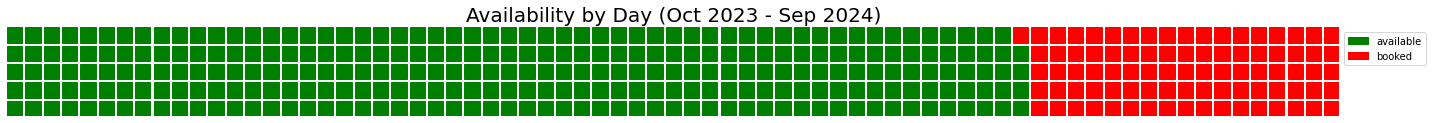

In [8]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
from datetime import datetime, timedelta

# Assuming your DataFrame is named 'df_01'

# Filter the data for the specified date range
start_date = datetime(2023, 10, 1)
end_date = datetime(2024, 9, 30)
filtered_df = df_01[(df_01['date'] >= start_date) & (df_01['date'] <= end_date)]

# Create a dictionary to map 'booked' ('f') and 'available' ('t') to the count of each in the data
data_counts = filtered_df['available'].apply(lambda x: 'booked' if x == 'f' else 'available').value_counts().to_dict()

# Create a list of colors based on 'available'
colors = ['red' if k == 'booked' else 'green' for k in data_counts.keys()]

# Calculate the number of days in the date range
date_range = end_date - start_date
num_days = date_range.days + 1

# Calculate the number of rows and columns based on the number of days
columns = num_days // 5  # Assuming 5 rows per column
rows = 5

# Set the figure size to be larger
fig = plt.figure(
    FigureClass=Waffle,
    rows=rows,
    columns=columns,
    values=data_counts,
    colors=colors,
    title={'label': 'Availability by Day (Oct 2023 - Sep 2024)', 'size': 20},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'labels': ['available', 'booked']},
    figsize=(20, 20)  # Adjust the figure size as needed
)

plt.show()


In [9]:
df_01.available.value_counts()

t    279
f     86
Name: available, dtype: int64

In [10]:
# Creating a df copy
correlation_data = df_01.copy()

correlation_data.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date,Weekend
date,,,,,,,,,,,,,,,,
2023-10-02,887753890602526154,2023-10-02,t,$496.00,$496.00,1.0,1.0,2023,4,10,40,0,2,275,2023-10-02,0
2023-10-03,887753890602526154,2023-10-03,f,$496.00,$496.00,1.0,1125.0,2023,4,10,40,1,3,276,2023-10-03,0
2023-10-04,887753890602526154,2023-10-04,f,$496.00,$496.00,1.0,1125.0,2023,4,10,40,2,4,277,2023-10-04,0
2023-10-05,887753890602526154,2023-10-05,f,$496.00,$496.00,1.0,1125.0,2023,4,10,40,3,5,278,2023-10-05,0
2023-10-06,887753890602526154,2023-10-06,f,$496.00,$496.00,1.0,1125.0,2023,4,10,40,4,6,279,2023-10-06,0
